## Tools for modern macroeconometrics

## Seminar 1.

### by Lukas Vacha

## Summer Semester 2021/2022

1. Plot the data and identify any unusual observations.
2. If necessary, transform the data to stabilise the variance.
3. If the data are non-stationary, take first differences of the data until the data are stationary.
4. Examine the ACF/PACF: Is an ARIMA(p,d,0) or ARIMA(0,d,q) model appropriate?
5. Try your chosen model(s), and use the AICc to search for a better model.
6. Check the residuals from your chosen model by plotting the ACF of the residuals, and doing a Box-Ljung test of the residuals. If they do not look like white noise, try a modified model.
7. Once the residuals look like white noise, calculate forecasts.

(for visualisation see the attachment below)

In [8]:
if (!require(forecast)) install.packages("forecast")
if (!require(forecast)) install.packages("uroot")

library(stats)
library(repr)
library(tseries)
#library(readr)
library(forecast)
#library(uroot)

Loading required package: forecast

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff



In [77]:
options(repr.plot.width = 10, repr.plot.height = 4)

## Data

In [9]:
yall   <- read.csv("ts_exALL.csv")
ned  <- read.csv("Ned.csv")  #GDP of Netherlands (Chage the computational methodolofy)
ur     <- read.csv("ur.csv")     #simulated unit root
proc <- read.csv("data_semina3.csv")

y1    <- yall[,1]
y2    <- yall[,2]
y3    <- yall[,3]

m1   <- yall[,4]
m2   <- yall[,5]

yr     <- rnorm(500)

tsqf  <- proc$Y3

ur1   <- ur[,1] #stationary AR(1) with jump in the middle [if you estimate first and second half it will show more accurate]
ur2   <- ur[,2] #unit root with unit jump

ned_v    <- ned[,1]
ned_diff <- ned[,2]

### Step 1. Plot the data and identify any unusual observations.

#### Which one is stationary?

A stationary time series is one whose properties do not depend on the time at which the series is observed.14 Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.

In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

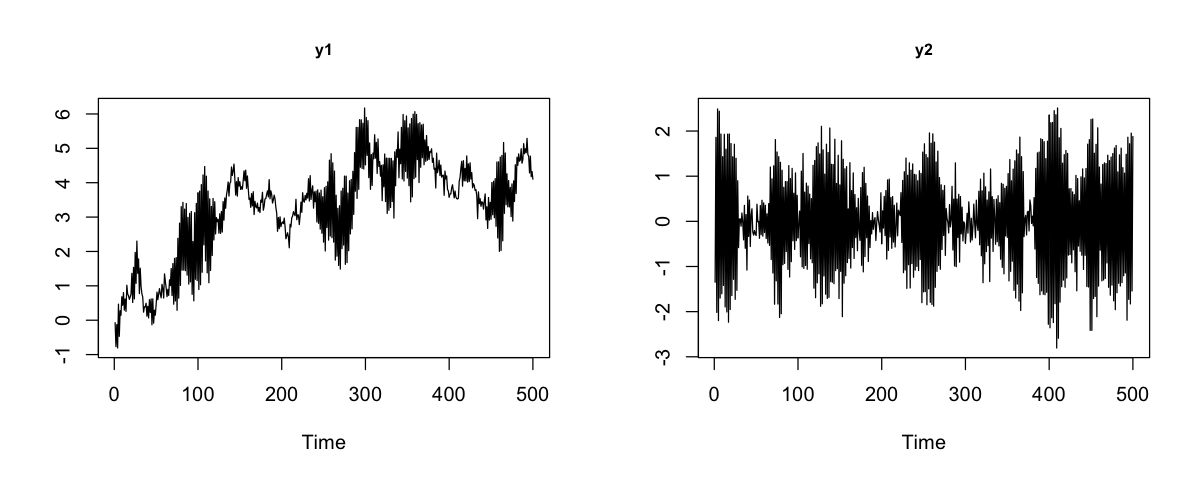

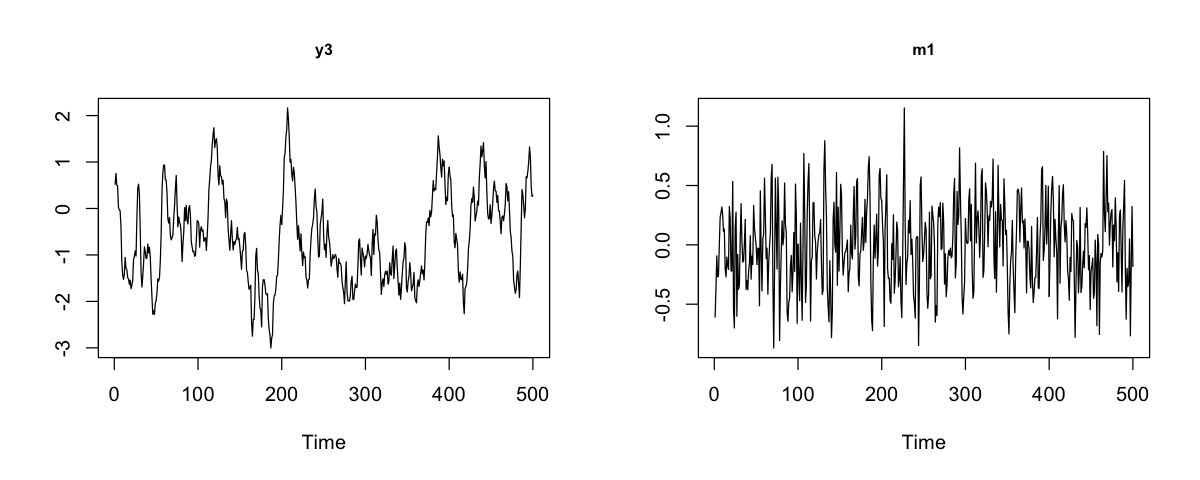

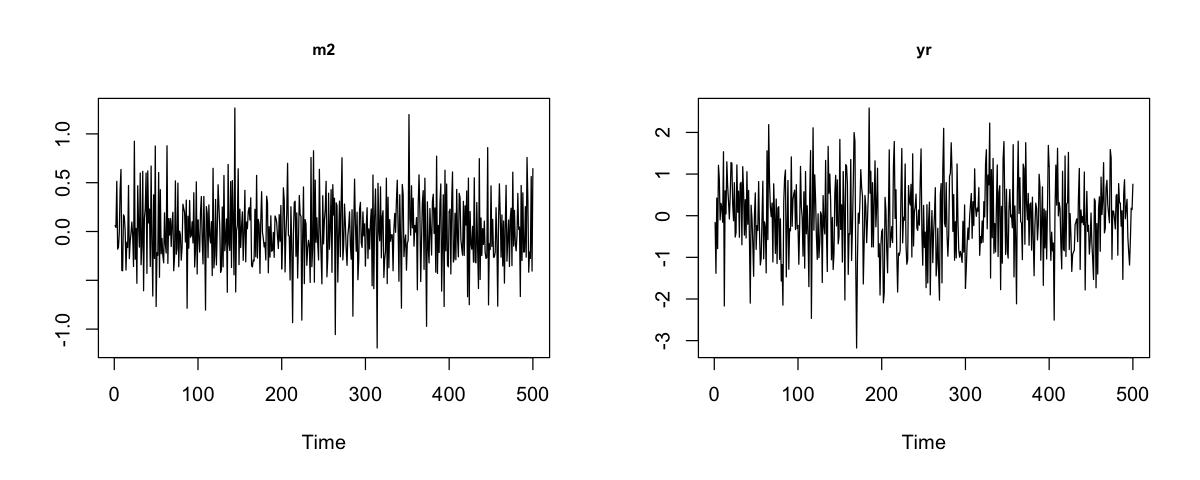

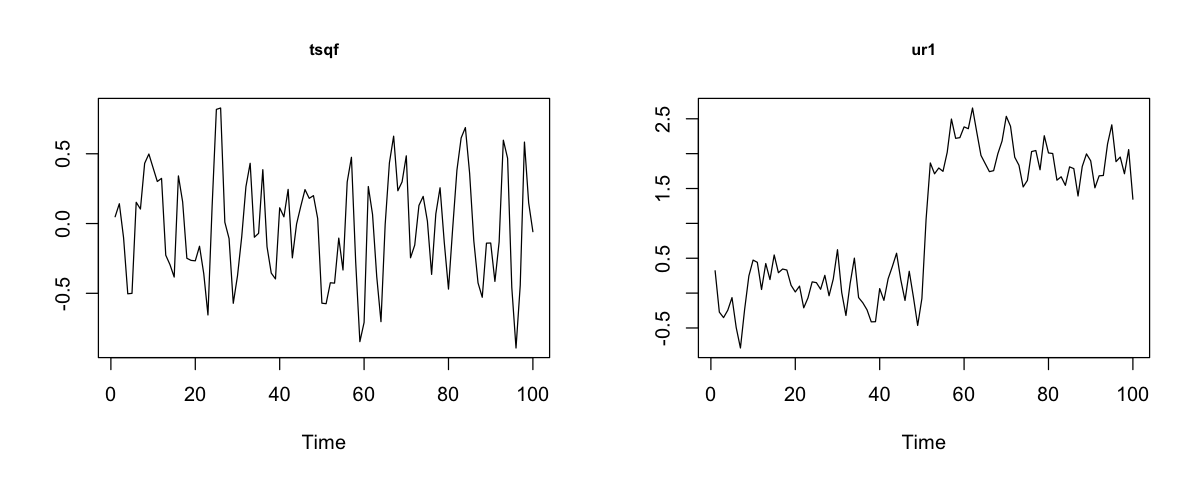

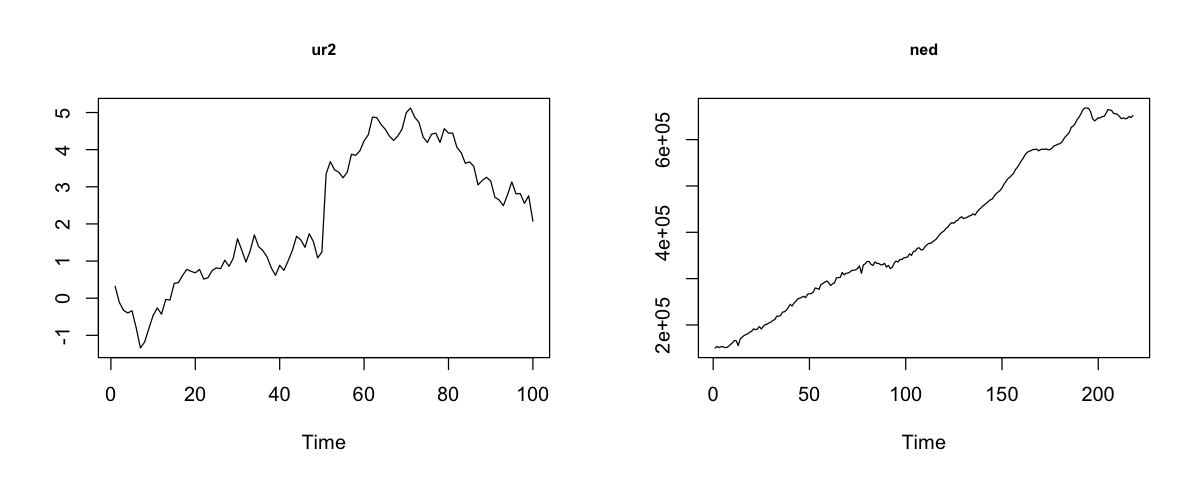

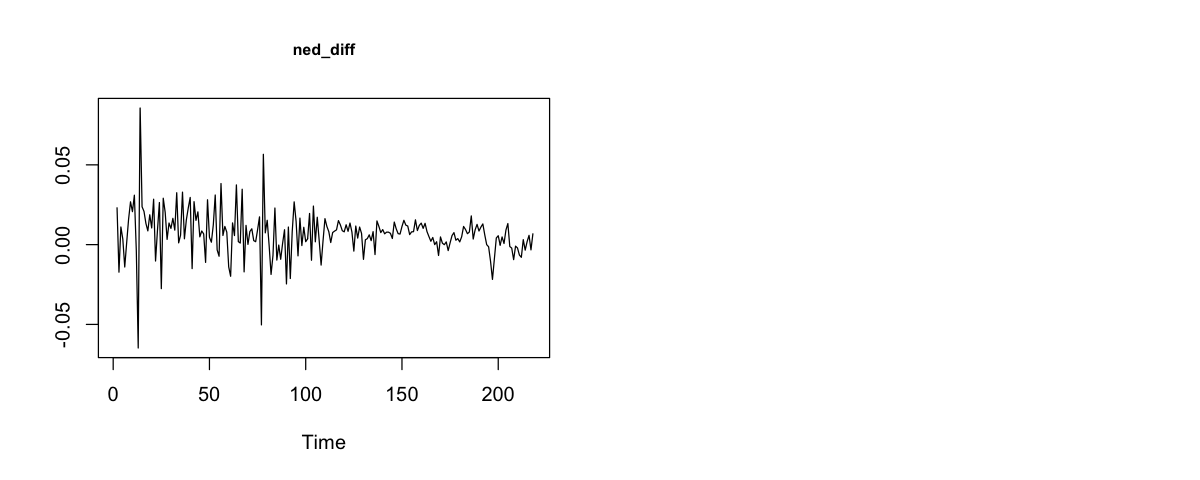

In [10]:
par(mfrow = c(1, 2))

plot.ts(y1, ylab = NA, main = 'y1', cex.main = 0.8)
plot.ts(y2, ylab = NA, main = 'y2', cex.main = 0.8)
plot.ts(y3, ylab = NA, main = 'y3', cex.main = 0.8)

plot.ts(m1, ylab = NA, main = 'm1', cex.main = 0.8)
plot.ts(m2, ylab = NA, main = 'm2', cex.main = 0.8)

plot.ts(yr, ylab = NA, main = 'yr', cex.main = 0.8)
plot.ts(tsqf, ylab = NA, main = 'tsqf', cex.main = 0.8)

plot.ts(ur1, ylab = NA, main = 'ur1', cex.main = 0.8)
plot.ts(ur2, ylab = NA, main = 'ur2', cex.main = 0.8)

plot.ts(ned_v, ylab = NA, main = 'ned', cex.main = 0.8)
plot.ts(ned_diff, ylab = NA, main = 'ned_diff', cex.main = 0.8)

## Simple Estimation Examples

Series: y 
ARIMA(4,0,0) with non-zero mean 

Coefficients:
         ar1     ar2      ar3     ar4    mean
      0.2272  0.9381  -0.2001  0.0248  2.9428
s.e.  0.0446  0.0449   0.0450  0.0449  1.1090

sigma^2 estimated as 0.09963:  log likelihood=-133.42
AIC=278.84   AICc=279.01   BIC=304.12

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.01641359 0.3140648 0.2518333 1.434736 15.68885 0.2850706
                     ACF1
Training set -0.003460778


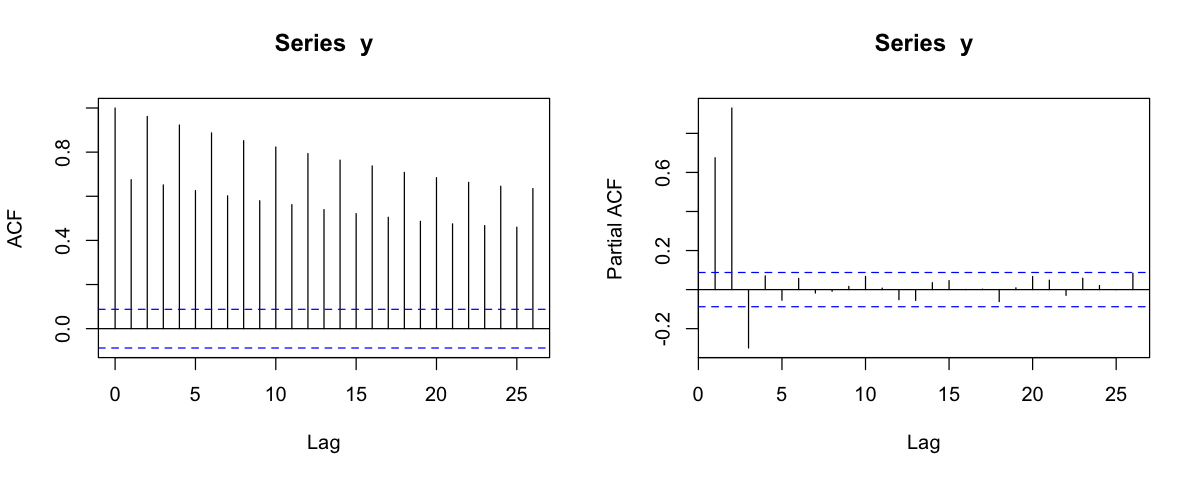

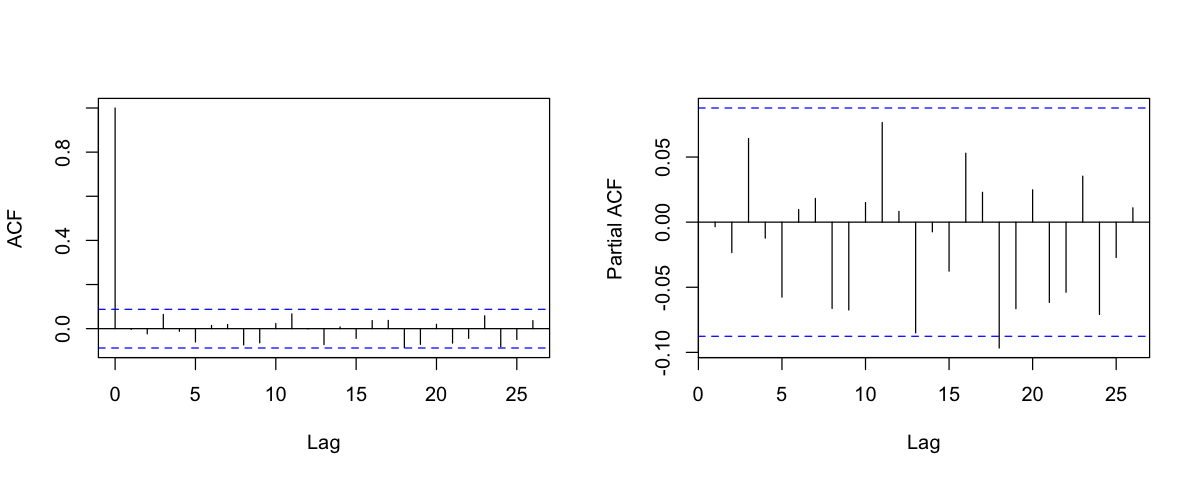

In [15]:
y <- y1
#y <- diff(y1, lag = 2)
#y <- diff(y1)

par(mfrow = c(1, 2))
acf(y)
pacf(y)

y_model <- Arima(y, order = c(4, 0, 0))
summary(y_model)

# y_model2 <- auto.arima(y)
# summary(y_model2)

par(mfrow = c(1, 2))
acf(y_model$residuals, main = NA)
pacf(y_model$residuals, main = NA)

### MA sign

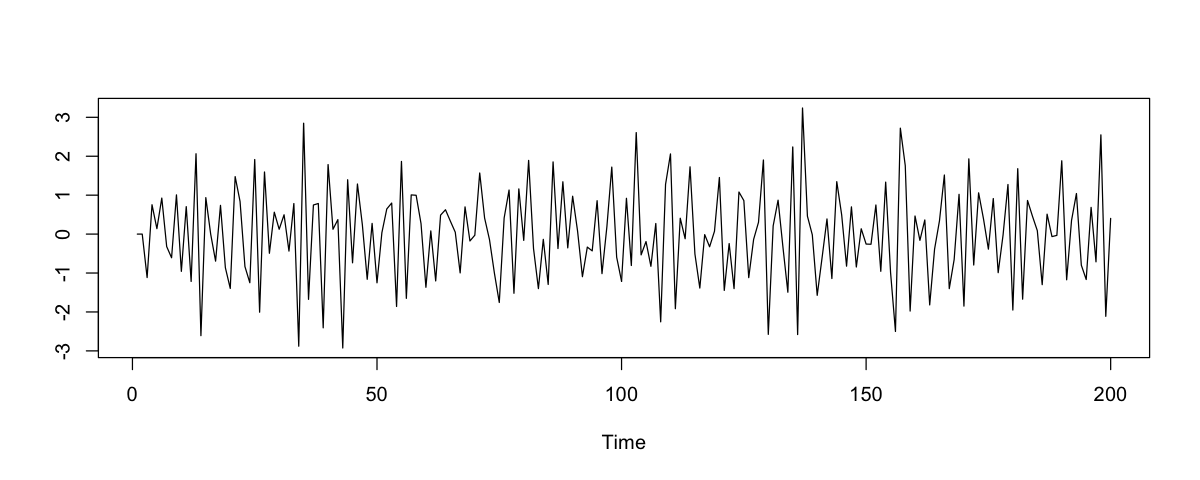

Series: y 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1     mean
      -0.8281  -0.0103
s.e.   0.0419   0.0120

sigma^2 estimated as 0.9349:  log likelihood=-276.63
AIC=559.26   AICc=559.38   BIC=569.16

Training set error measures:
                        ME      RMSE       MAE MPE MAPE      MASE       ACF1
Training set -0.0002601996 0.9620614 0.7655992 NaN  Inf 0.4397568 0.03905792


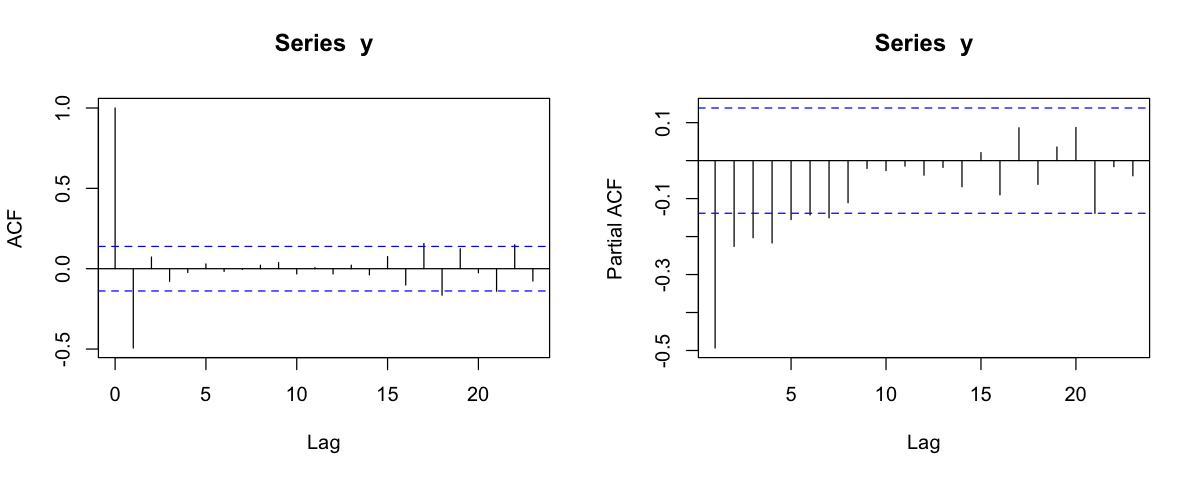

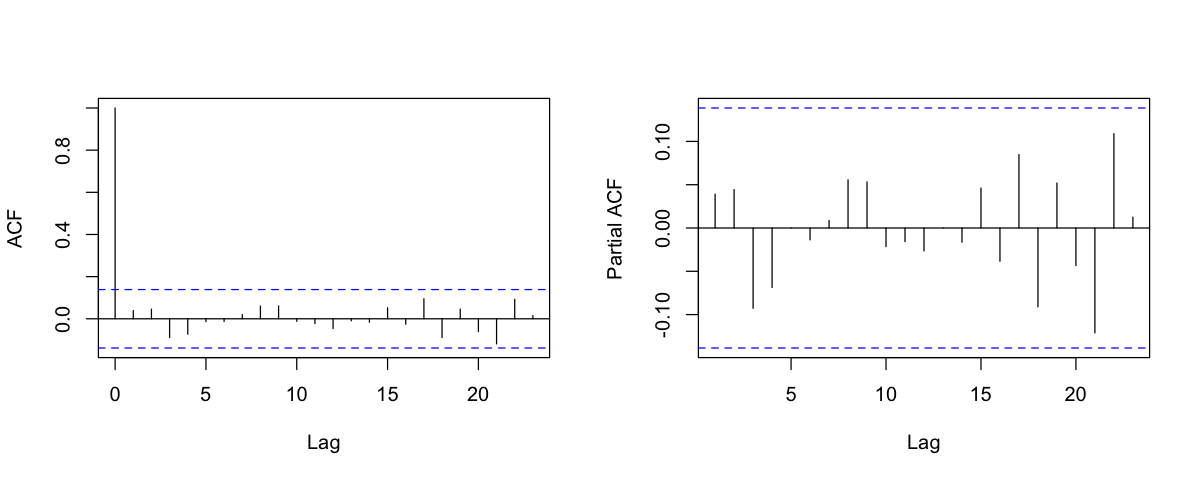

In [18]:
#set.seed(100)
set.seed(101)
l <- 200
e <- rnorm(l)
yd <- vector()
#phi1 <- 0.9
phi1 <- 0
phi2 <- 0
theta1 = -0.8 # Change sign here!
yd[1] <- 0
yd[2] <- phi1 * e[1]
for (i in 3 : l){
    yd[i] <- phi1 * yd[i - 1] + phi2 * yd[i - 2]  + theta1 * e[i-1]+ e[i]
}
options(repr.plot.width = 10, repr.plot.height = 4)
plot.ts(yd, ylab = NA)
# Plot spectrum

y <- yd
#y <- diff(y1, lag = 2)
#y <- diff(y1)

par(mfrow = c(1, 2))
acf(y)
pacf(y)

y_model <- Arima(y, order = c(0, 0, 1))
summary(y_model)

# y_model2 <- auto.arima(y)
# summary(y_model2)

par(mfrow = c(1, 2))
acf(y_model$residuals, main = NA)
pacf(y_model$residuals, main = NA)


### Estimated spectrum

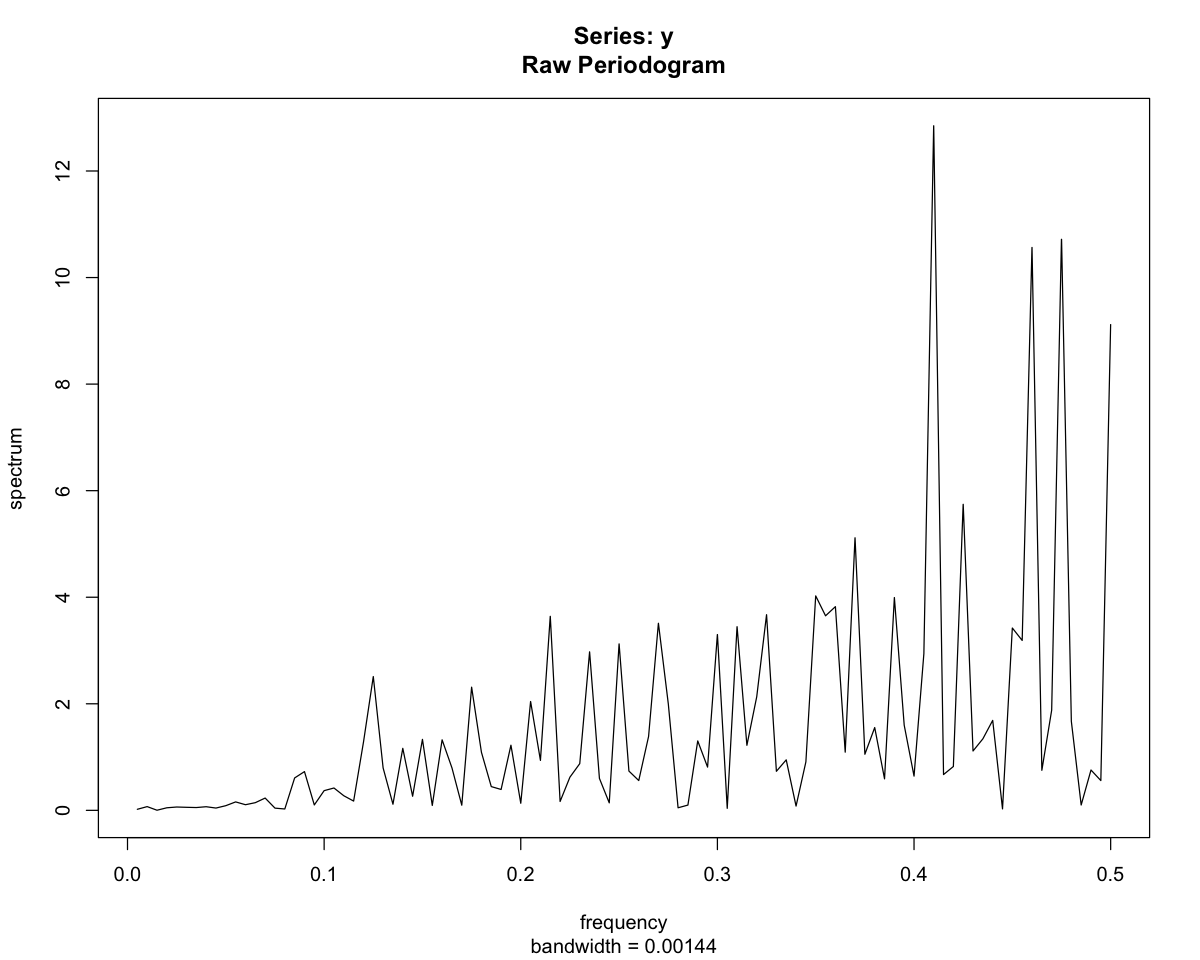

In [19]:
options(repr.plot.width = 10, repr.plot.height = 8)
spec.pgram(y, taper=0.1, log="no")
options(repr.plot.width = 10, repr.plot.height = 4)

In [ ]:


y <- y1
#y <- diff(y1, lag = 2)
#y <- diff(y1)

par(mfrow = c(1, 2))
acf(y)
pacf(y)

y_model <- Arima(y, order = c(3, 0, 0))
summary(y_model)

# y_model2 <- auto.arima(y)
# summary(y_model2)

par(mfrow = c(1, 2))
acf(y_model$residuals, main = NA)
pacf(y_model$residuals, main = NA)

#### Pick the series

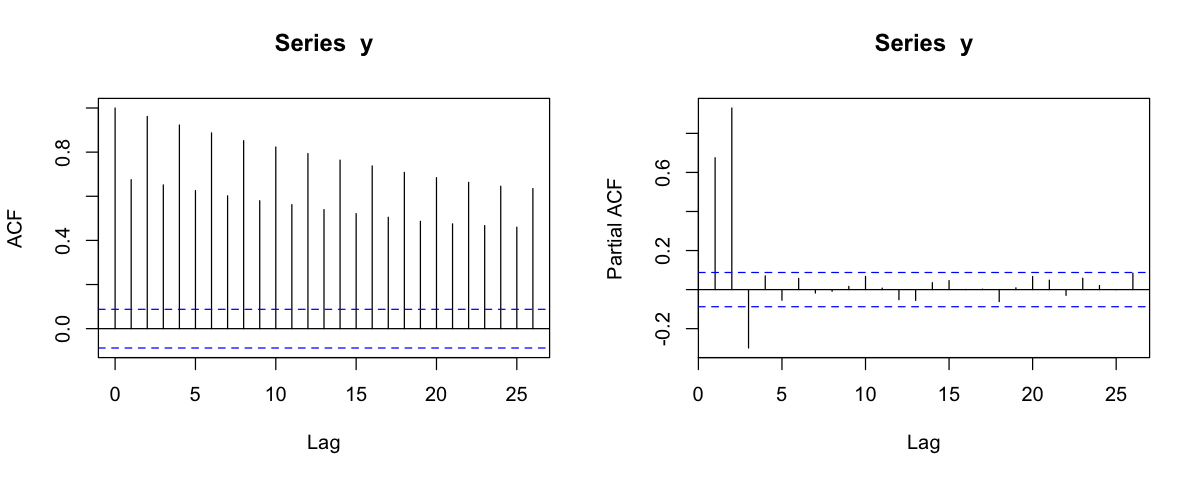

In [82]:
y <- y1

par(mfrow = c(1, 2))
acf(y)
pacf(y)

#### Identification

In [6]:
adf.test(y)


	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -2.7517, Lag order = 7, p-value = 0.2601
alternative hypothesis: stationary


### Step 3. If the data are non-stationary, take first differences of the data until the data are stationary.

In [7]:
y <- diff(y1, lag = 2)
#y <- diff(y1)

In [8]:
adf.test(y)

Warning message in adf.test(y):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -8.301, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


### Step 4. Examine the ACF/PACF: Is an ARIMA(p,d,0) or ARIMA(0,d,q) model appropriate?

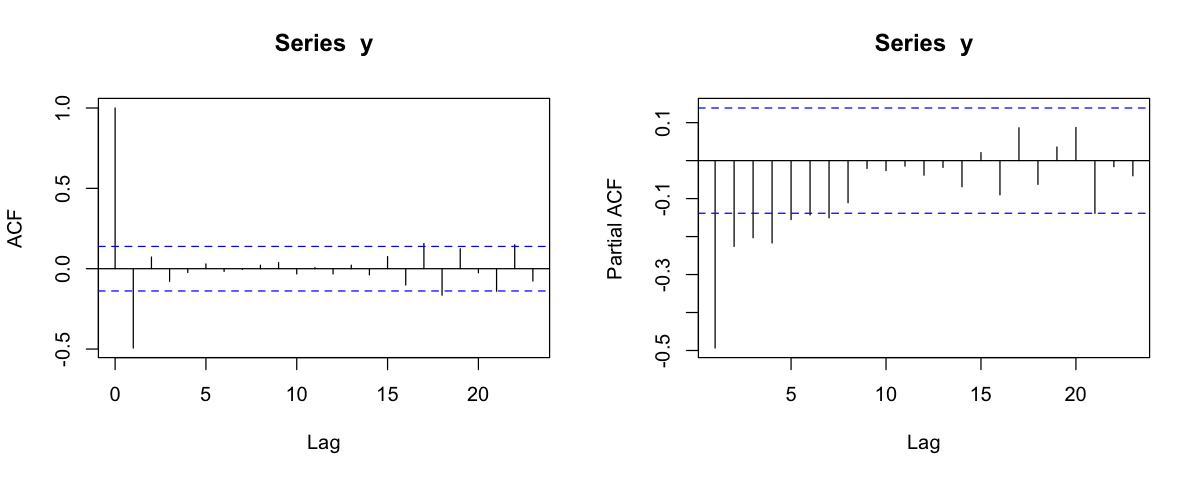

In [21]:
par(mfrow = c(1, 2))

acf(y)
pacf(y)

### Step 5. Try your chosen model(s), and use the AICc to search for a better model.

In [20]:
y_model <- Arima(y, order = c(1, 0, 0))
summary(y_model)

Series: y 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1     mean
      -0.4913  -0.0112
s.e.   0.0613   0.0506

sigma^2 estimated as 1.147:  log likelihood=-296.61
AIC=599.22   AICc=599.34   BIC=609.11

Training set error measures:
                       ME     RMSE       MAE MPE MAPE      MASE       ACF1
Training set 1.495994e-05 1.065465 0.8571558 NaN  Inf 0.4923465 -0.1125725


In [11]:
y_model1 <- Arima(y, order = c(0, 0, 2))
summary(y_model1)

Series: y 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
         ma1      ma2    mean
      0.2219  -0.0332  0.0186
s.e.  0.0444   0.0439  0.0168

sigma^2 estimated as 0.1003:  log likelihood=-132.47
AIC=272.94   AICc=273.02   BIC=289.78

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 1.336546e-05 0.3156908 0.2517392 829.0278 897.6965 0.7770579
                     ACF1
Training set -0.001873376


In [12]:
y_model2 <- auto.arima(y)
summary(y_model2)

Series: y 
ARIMA(0,0,1) with zero mean 

Coefficients:
         ma1
      0.2269
s.e.  0.0459

sigma^2 estimated as 0.1002:  log likelihood=-133.33
AIC=270.66   AICc=270.69   BIC=279.08

Training set error measures:
                     ME      RMSE      MAE      MPE     MAPE      MASE
Training set 0.01517834 0.3162382 0.252373 712.2261 783.0118 0.7790142
                     ACF1
Training set -0.009250892


In [13]:
y_model3 <- auto.arima(y, approximation=FALSE, stepwise =FALSE )
summary(y_model3)

Series: y 
ARIMA(2,0,3) with zero mean 

Coefficients:
          ar1      ar2     ma1     ma2     ma3
      -0.0182  -0.8203  0.2425  0.8365  0.2682
s.e.   0.0976   0.1142  0.1012  0.1081  0.0441

sigma^2 estimated as 0.09897:  log likelihood=-128.31
AIC=268.62   AICc=268.79   BIC=293.88

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.01449812 0.3130118 0.2506621 427.1741 537.2756 0.7737332
                     ACF1
Training set -0.005125398


The default procedure uses some approximations to speed up the search. These approximations can be avoided with the argument "approximation=FALSE". It is possible that the minimum AICc model will not be found due to these approximations, or because of the use of a stepwise procedure. A much larger set of models will be searched if the argument "stepwise=FALSE" is used. See the help file for a full description of the arguments. (?auto.arima())

### 6. Check the residuals from your chosen model by plotting the ACF of the residuals, and doing a Box-Ljung test of the residuals. If they do not look like white noise, try a modified model.

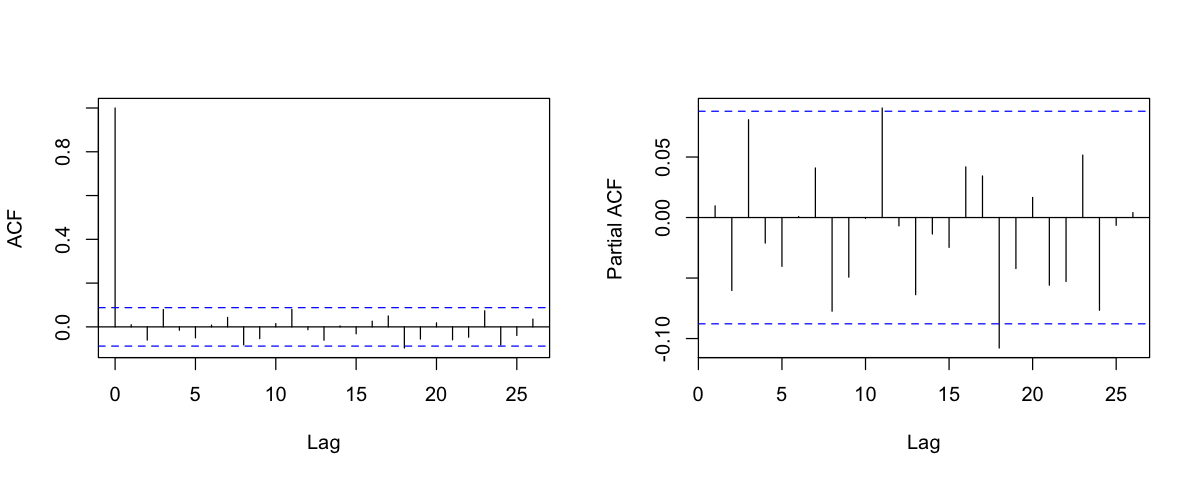

In [14]:
par(mfrow = c(1, 2))
acf(y_model$residuals, main = NA)
pacf(y_model$residuals, main = NA)

#### The Box-Ljung test:

The Box-Ljung test (1978) is a diagnostic tool used to test the lack of fit of a time series model. The test is applied to the $\textbf{residuals}$ of a time series after fitting an ARMA(p,q) model to the data. The test examines m autocorrelations of the residuals. If the autocorrelations are very small, we conclude that the model does not exhibit significant lack of fit.

$H_{0}$:	The model does not exhibit lack of fit.

$H_a$:	The model exhibits lack of fit.

https://itl.nist.gov/div898/handbook/pmc/section4/pmc4481.htm

In [15]:
Box.test(y_model$residuals, type = "Ljung-Box", lag = 4)
Box.test(y_model$residuals, type = "Ljung-Box", lag = 8)
Box.test(y_model$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  y_model$residuals
X-squared = 5.1469, df = 4, p-value = 0.2726



	Box-Ljung test

data:  y_model$residuals
X-squared = 10.839, df = 8, p-value = 0.211



	Box-Ljung test

data:  y_model$residuals
X-squared = 15.798, df = 12, p-value = 0.2006


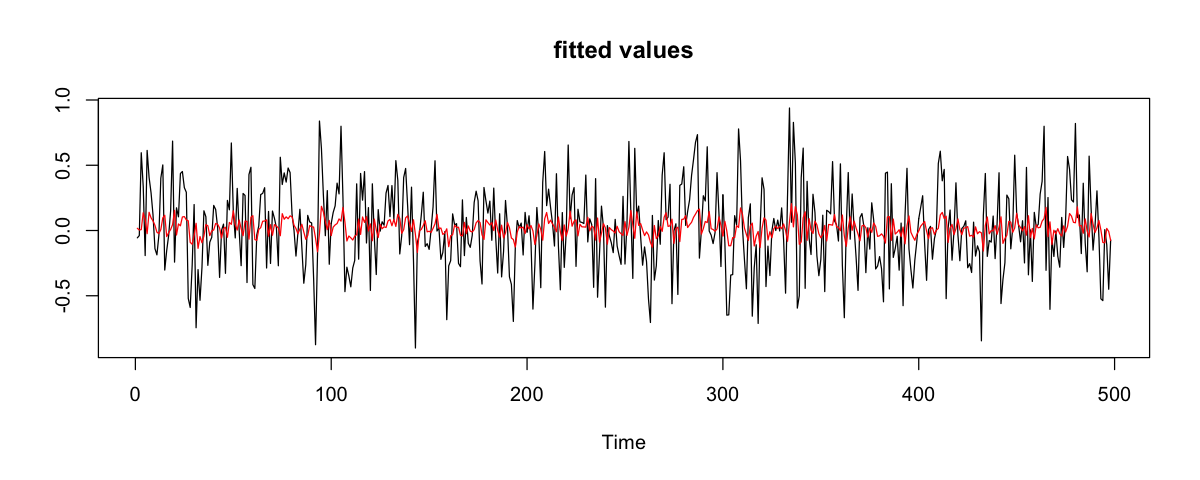

In [16]:
plot.ts(y, ylab = NA, main = 'fitted values')
lines(y_model$fitted, col = 'red')

# Subsets

In [17]:
y_start  <- y[1:100]
y_01     <- y[1:(length(y) / 2)-1]  #200 obs. 1:99
y_02     <- y[(length(y) / 2):length(y)] # 100 : 200
# try also ned

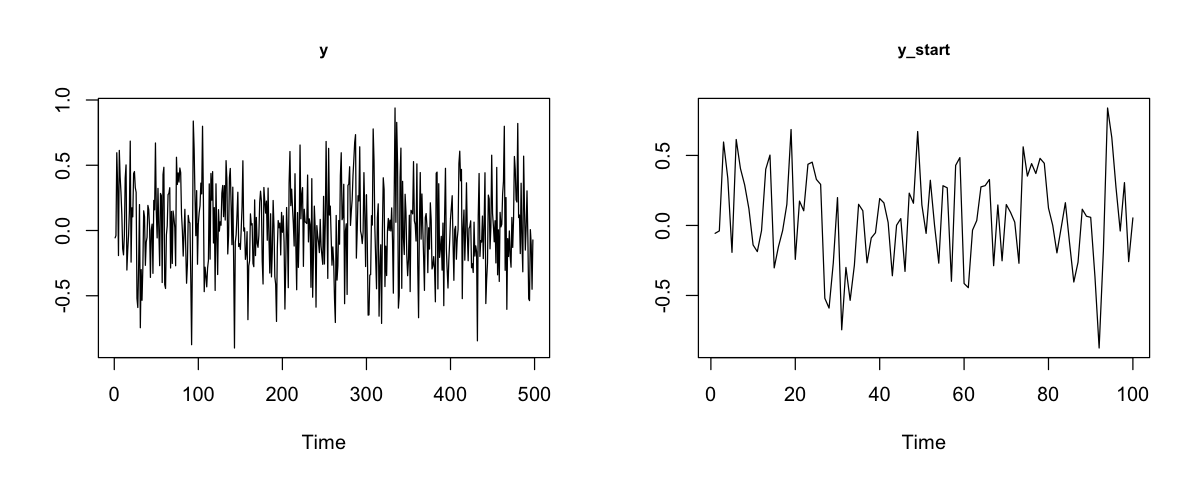

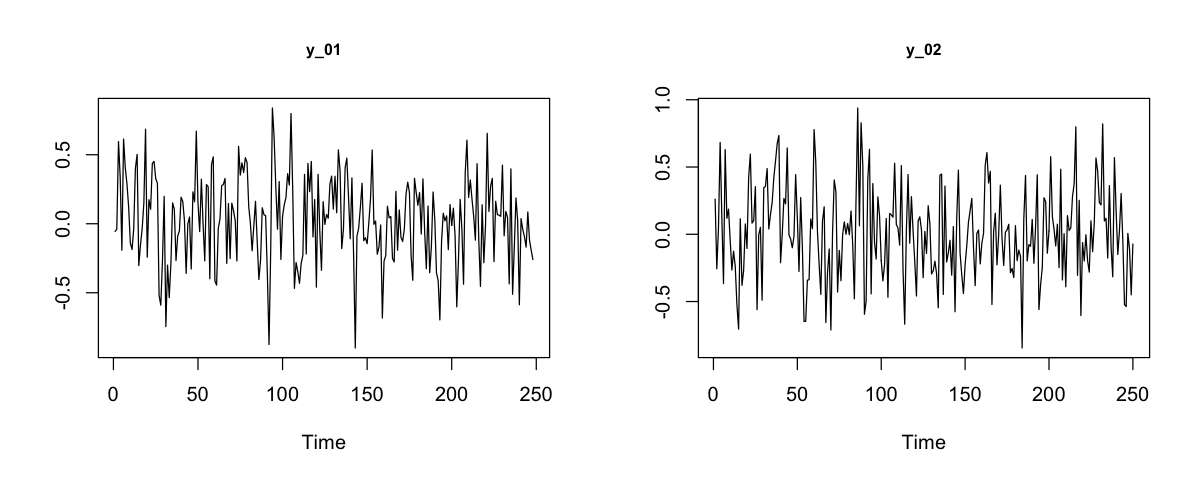

In [18]:
par(mfrow = c(1, 2))

plot.ts(y, ylab = NA, main = 'y', cex.main = 0.8)
plot.ts(y_start, ylab = NA, main = 'y_start', cex.main = 0.8)
plot.ts(y_01, ylab = NA, main = 'y_01', cex.main = 0.8)
plot.ts(y_02, ylab = NA, main = 'y_02', cex.main = 0.8)

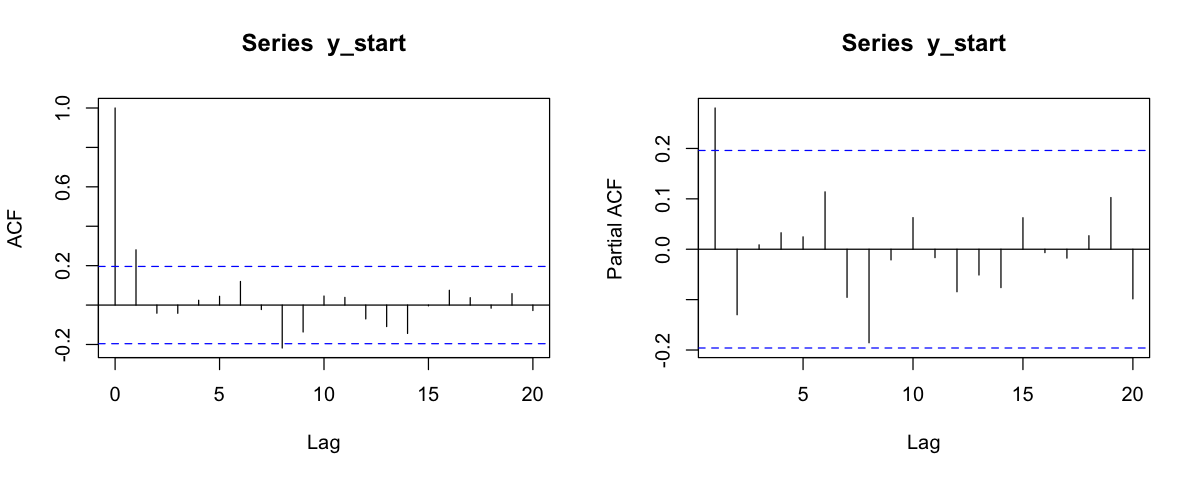

In [19]:
par(mfrow = c(1, 2))
acf(y_start)
pacf(y_start)

In [20]:
adf.test(y_start)


	Augmented Dickey-Fuller Test

data:  y_start
Dickey-Fuller = -3.8907, Lag order = 4, p-value = 0.01731
alternative hypothesis: stationary


# Over-differencing and issues with automatic routines


	Augmented Dickey-Fuller Test

data:  yd
Dickey-Fuller = -3.3485, Lag order = 5, p-value = 0.06471
alternative hypothesis: stationary


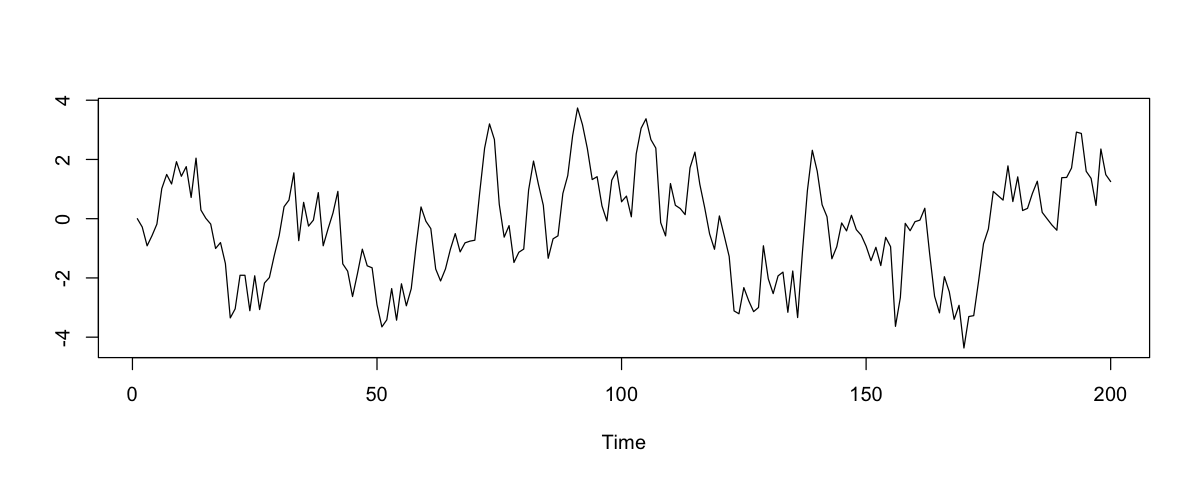

In [28]:
#set.seed(100)
set.seed(101)
l <- 200
e <- rnorm(l)
yd <- vector()
#phi1 <- 0.9
phi1 <- 0.86
phi2 <- 0
yd[1] <- 0
yd[2] <- phi1 * e[1]
for (i in 3 : l){
    yd[i] <- phi1 * yd[i - 1] + phi2 * yd[i - 2] + e[i]
}

plot.ts(yd, ylab = NA)

adf.test(yd)

### Standard Estimation of time series

Series: yd 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1     mean
      0.8274  -0.2956
s.e.  0.0390   0.3855

sigma^2 estimated as 0.9363:  log likelihood=-276.77
AIC=559.55   AICc=559.67   BIC=569.44

Training set error measures:
                       ME      RMSE      MAE MPE MAPE     MASE       ACF1
Training set -0.001804217 0.9627605 0.767718 Inf  Inf 0.932942 0.04729876


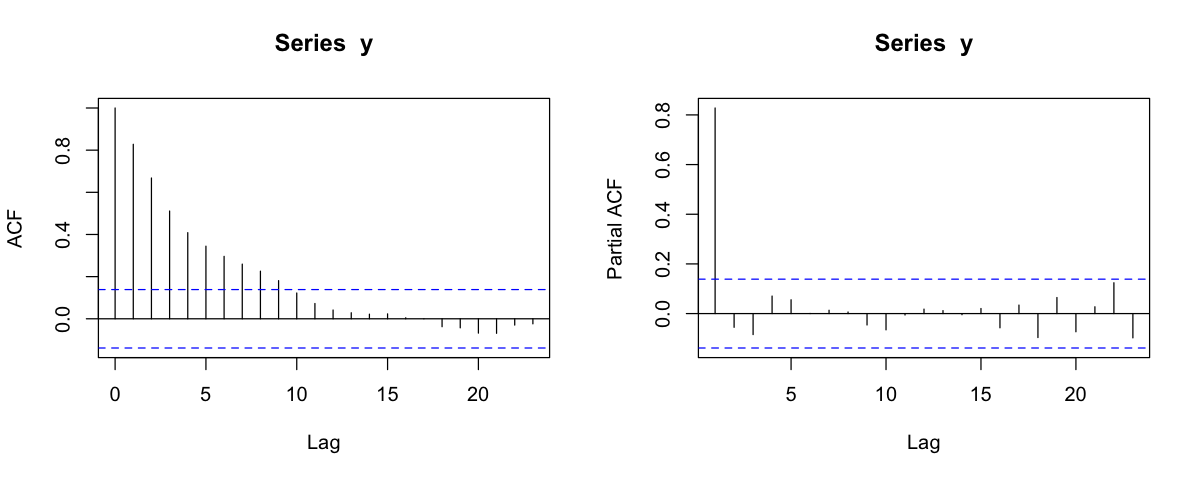

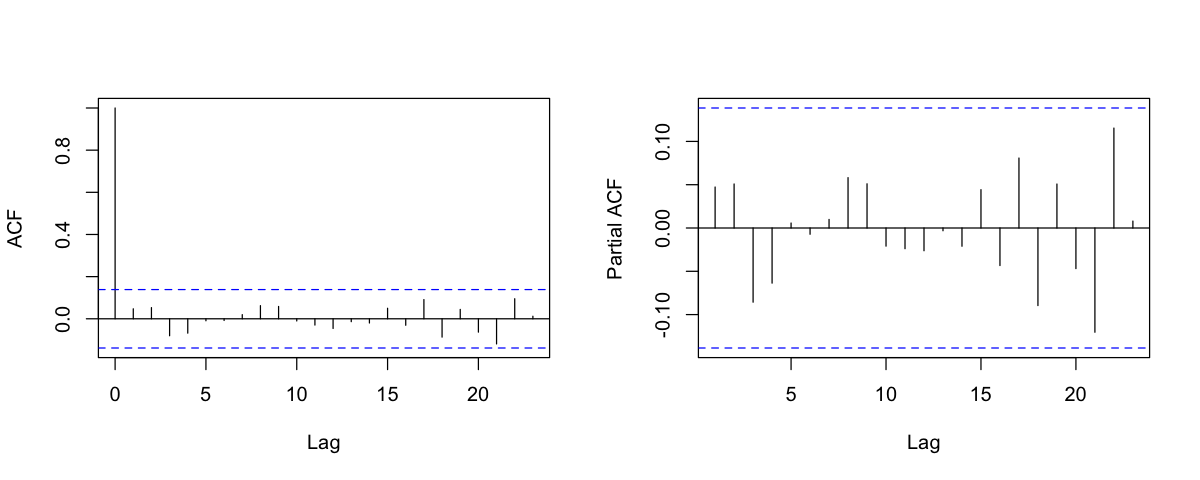

In [29]:
y<-yd
par(mfrow = c(1, 2))
acf(y)
pacf(y)

y_model <- Arima(yd, order = c(1, 0, 0))
# Try also c(1,0,1) and compare ACF of res., AIC ans BIC
summary(y_model)

# y_model2 <- auto.arima(y)
# summary(y_model2)

par(mfrow = c(1, 2))
acf(y_model$residuals, main = NA)
pacf(y_model$residuals, main = NA)

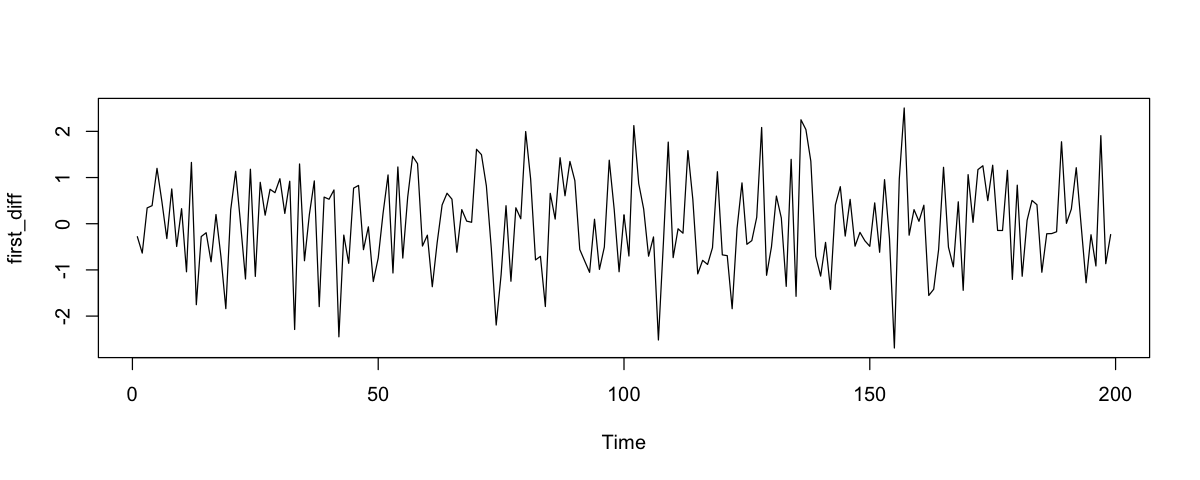

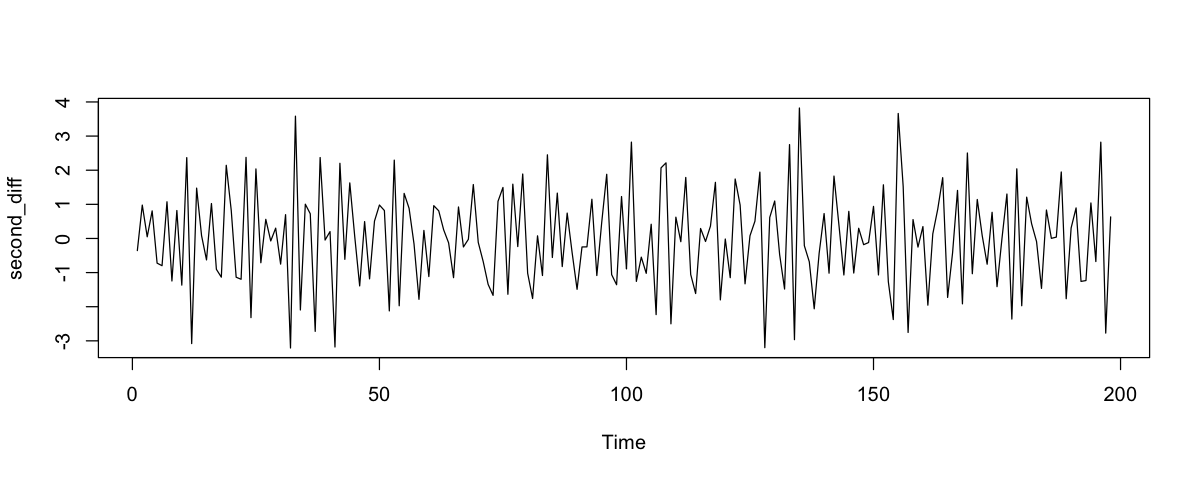

In [30]:
first_diff <- diff(yd)
second_diff <- diff(yd, differences = 2)

plot.ts(first_diff)
plot.ts(second_diff)

### Auto ARIMA

In [34]:
fit_y <- auto.arima(yd)
fit_y

fit_y1 <- auto.arima(yd,  approximation=FALSE, stepwise =FALSE)
fit_y1

fit_fd <- auto.arima(first_diff)
fit_fd

fit_fd1 <- auto.arima(first_diff,  approximation=FALSE, stepwise =FALSE)
fit_fd1

autofit_sd <- auto.arima(second_diff)
autofit_sd

autofit_sd1 <- auto.arima(second_diff,  approximation=FALSE, stepwise =FALSE)
autofit_sd1

Series: yd 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.8331
s.e.  0.0383

sigma^2 estimated as 0.9341:  log likelihood=-277.06
AIC=558.11   AICc=558.17   BIC=564.71

Series: yd 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.8331
s.e.  0.0383

sigma^2 estimated as 0.9341:  log likelihood=-277.06
AIC=558.11   AICc=558.17   BIC=564.71

Series: first_diff 
ARIMA(0,0,0) with zero mean 

sigma^2 estimated as 1.016:  log likelihood=-283.95
AIC=569.91   AICc=569.93   BIC=573.2

Series: first_diff 
ARIMA(0,0,4) with zero mean 

Coefficients:
          ma1      ma2      ma3      ma4
      -0.0965  -0.0781  -0.2061  -0.1564
s.e.   0.0705   0.0705   0.0756   0.0724

sigma^2 estimated as 0.9754:  log likelihood=-278.03
AIC=566.06   AICc=566.37   BIC=582.53

Series: second_diff 
ARIMA(5,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.7976  -0.5682  -0.4918  -0.3894  -0.1927
s.e.   0.0697   0.0858   0.0884   0.0858   0.0701

sigma^2 estimated as 1.288:  log likelihood=-304.02
AIC=620.04   AICc=620.48   BIC=639.77

Series: second_diff 
ARIMA(5,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.7976  -0.5682  -0.4918  -0.3894  -0.1927
s.e.   0.0697   0.0858   0.0884   0.0858   0.0701

sigma^2 estimated as 1.288:  log likelihood=-304.02
AIC=620.04   AICc=620.48   BIC=639.77

### Standard Estimation of Differences

Series: first_diff 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8352  -1.0000  0.0028
s.e.  0.0402   0.0145  0.0067

sigma^2 estimated as 0.945:  log likelihood=-276.69
AIC=561.39   AICc=561.59   BIC=574.56

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.01557875 0.9647365 0.7752999 315.4157 348.0305 0.6533891
                   ACF1
Training set 0.03921466


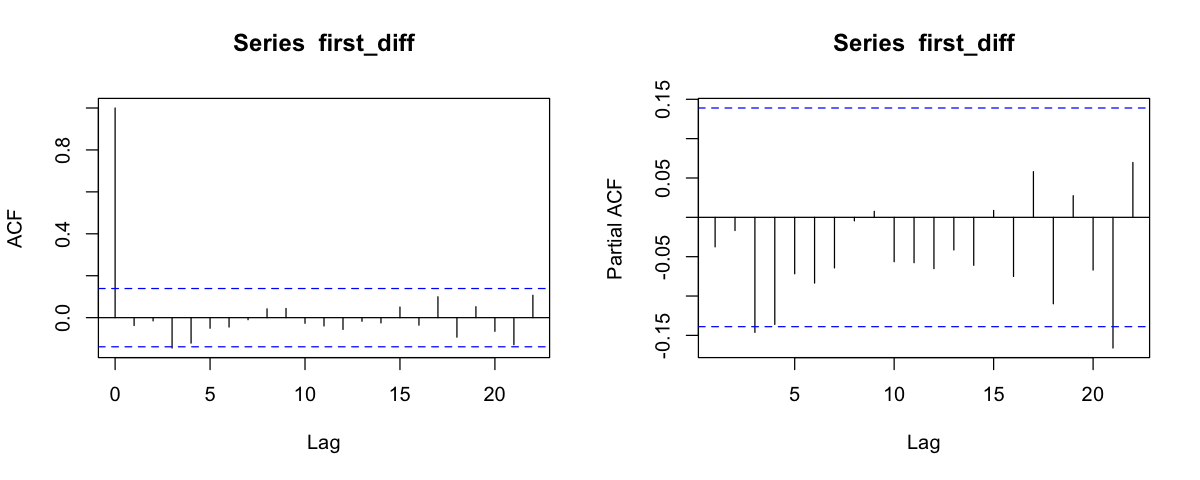

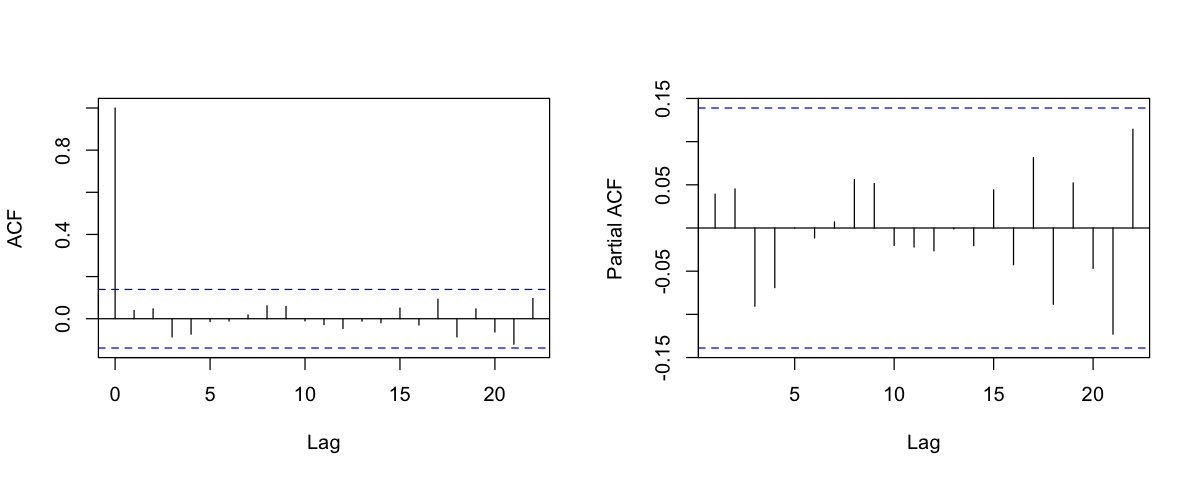

In [33]:
# first_diff <- diff(yd)
# second_diff <- diff(yd, differences = 2)

par(mfrow = c(1, 2))
acf(first_diff)
pacf(first_diff)

y_model <- Arima(first_diff, order = c(1, 0, 1))
summary(y_model)

# y_model2 <- auto.arima(y)
# summary(y_model2)

par(mfrow = c(1, 2))
acf(y_model$residuals, main = NA)
pacf(y_model$residuals, main = NA)

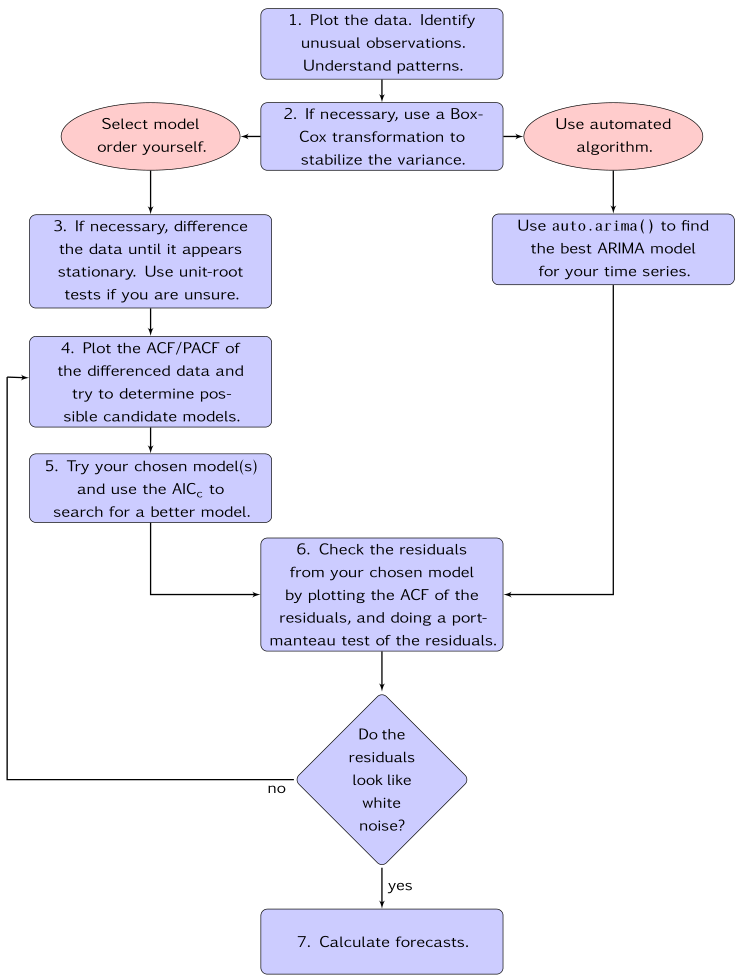